In [249]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model  import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score , classification_report,precision_score,f1_score,recall_score
import warnings
warnings.filterwarnings('ignore')

In [250]:
data1=pd.read_csv('values.csv')
data1

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [251]:
data2=pd.read_csv("labels.csv")
data2

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [252]:
data = pd.merge(data2,data1,on = 'patient_id')
data

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,1,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,1,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,1,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,0,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


# Basics Checks

In [130]:
data.head()

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [131]:
#insights: It gives data present in first 5 rows also tells feature of each column

In [132]:
data.tail()

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
175,5qfar3,1,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,1,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,1,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,0,1,normal,124,3,2,1,0,255,0.0,1,48,175,0
179,2nx10r,0,1,normal,160,3,1,0,0,201,0.0,0,54,163,0


In [133]:
#insights:It shows data in last 5 rows

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   heart_disease_present                 180 non-null    int64  
 2   slope_of_peak_exercise_st_segment     180 non-null    int64  
 3   thal                                  180 non-null    object 
 4   resting_blood_pressure                180 non-null    int64  
 5   chest_pain_type                       180 non-null    int64  
 6   num_major_vessels                     180 non-null    int64  
 7   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 8   resting_ekg_results                   180 non-null    int64  
 9   serum_cholesterol_mg_per_dl           180 non-null    int64  
 10  oldpeak_eq_st_depression              180 non-null    float64
 11  sex                

In [135]:
# insights:There are total180 rows and 14 columns.
# Dtype of patient_id and Thal is object.Oldpeak_eq_st_depression is float rest of the columns are integer type.

In [136]:
data.describe()

,heart_disease_present,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.444444,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.498290,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,0.000000,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,0.000000,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,0.000000,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,1.000000,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,1.000000,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [137]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
heart_disease_present,180.0,0.444444,0.498290,0.0,0.00,0.0,1.00,1.0
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0


In [138]:
#insights: fasting blood sugar,sex and excercise induced angina have only binary values(0,1)

In [139]:
data.describe(include=['O'])

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


In [140]:
#insights:there are 3 unique values in thal and frequency of occuring "normal" is 98

# EDA

# Univariate Analysis

                                             |                                             | [  0%]   00:00 ->…


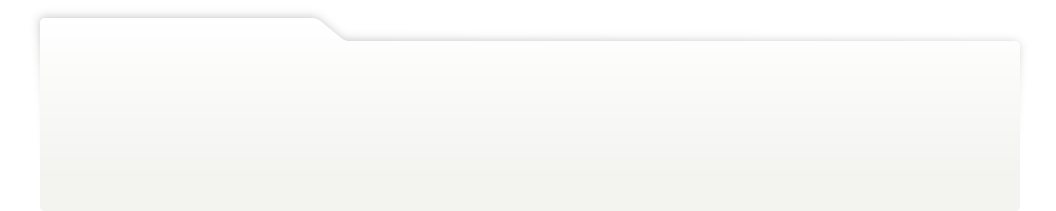
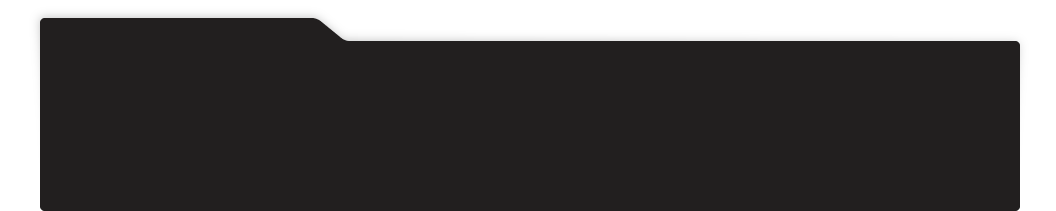
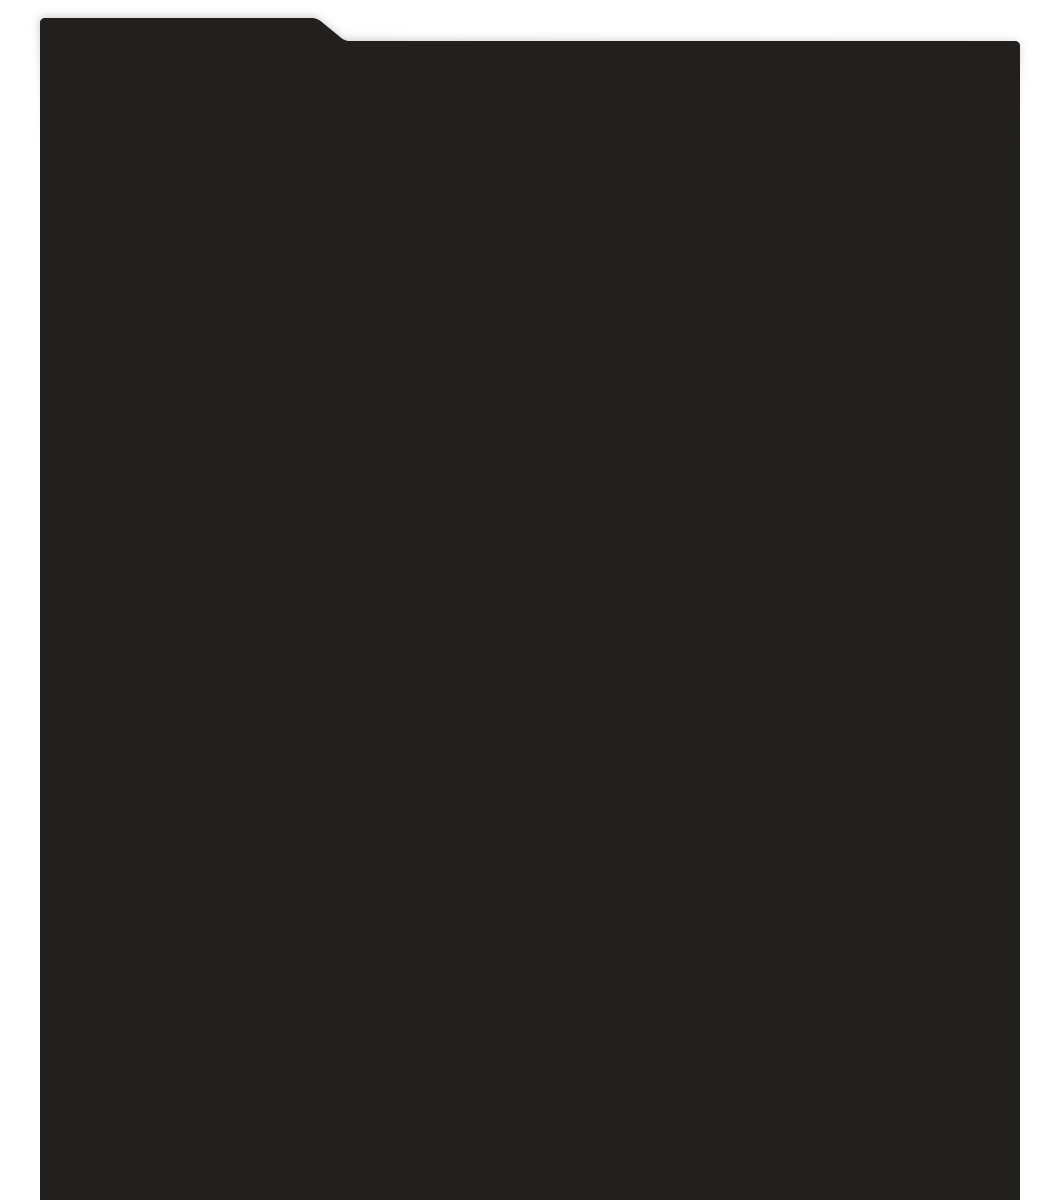
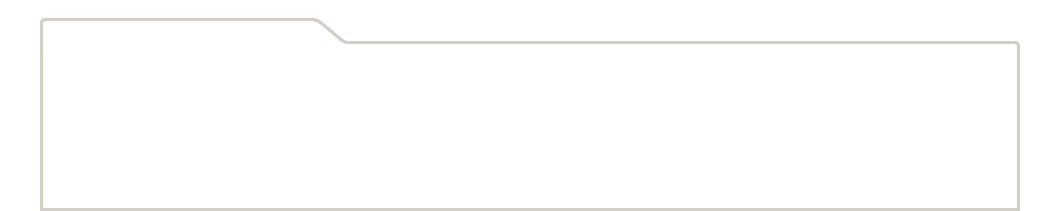
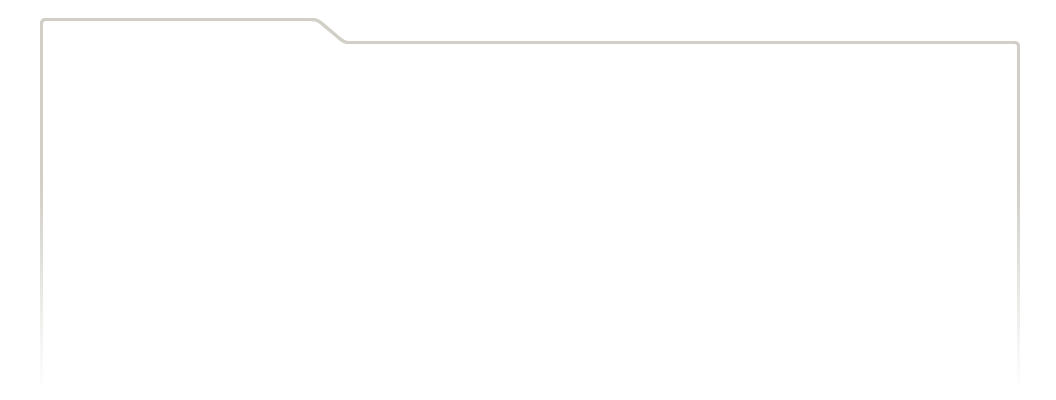
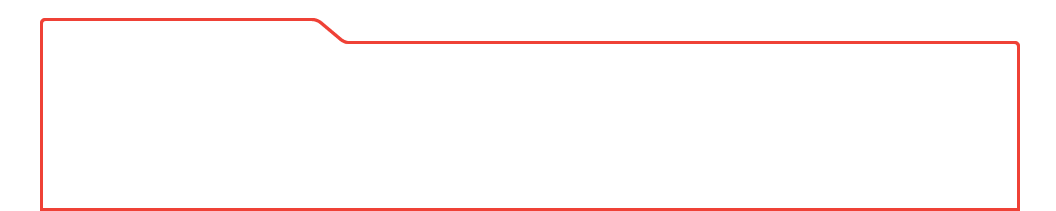
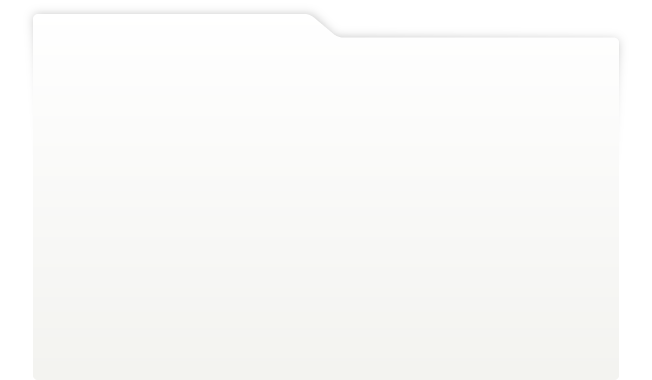
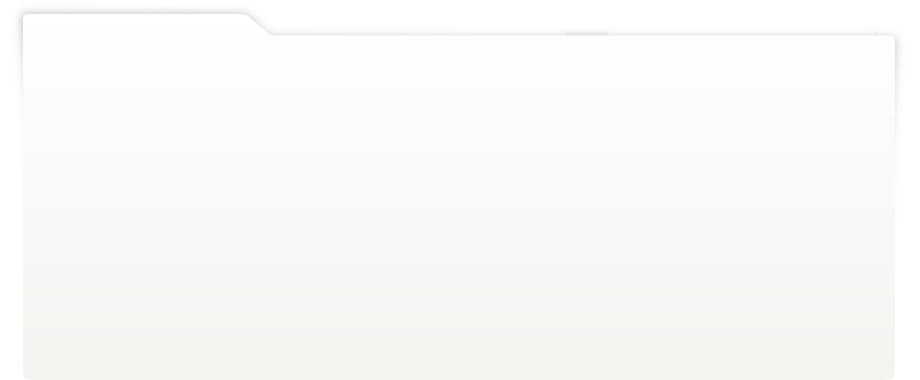
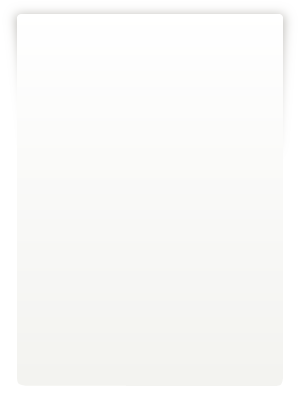
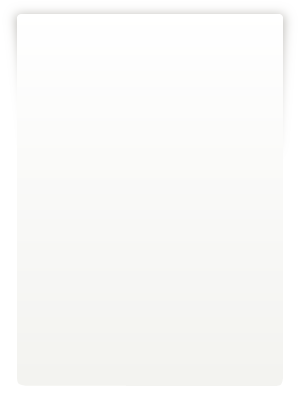
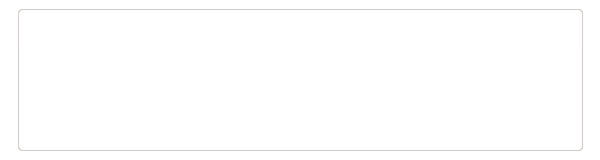
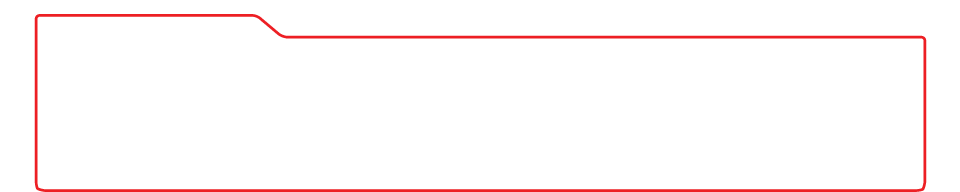
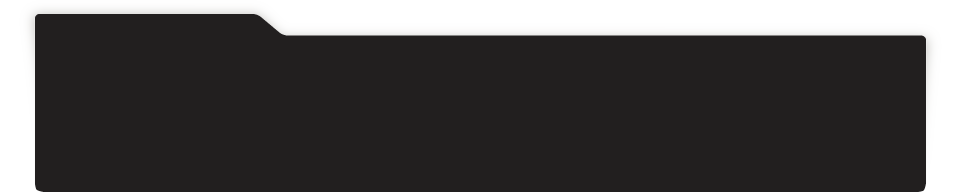
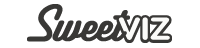
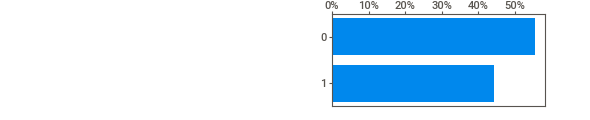
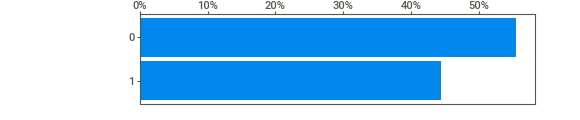
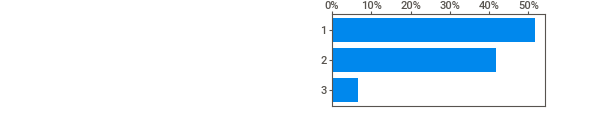
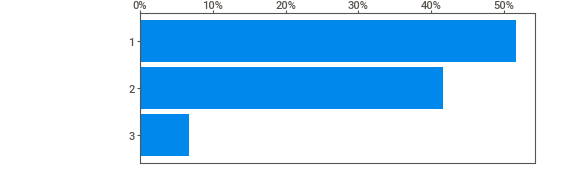
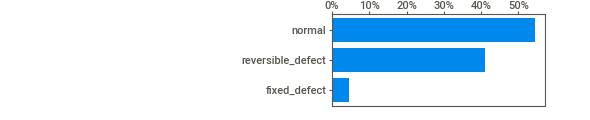
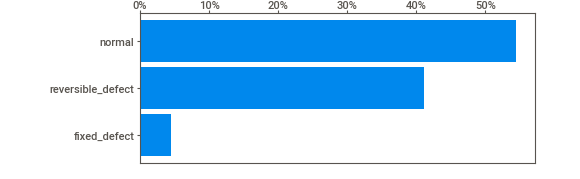
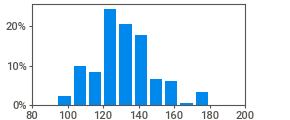
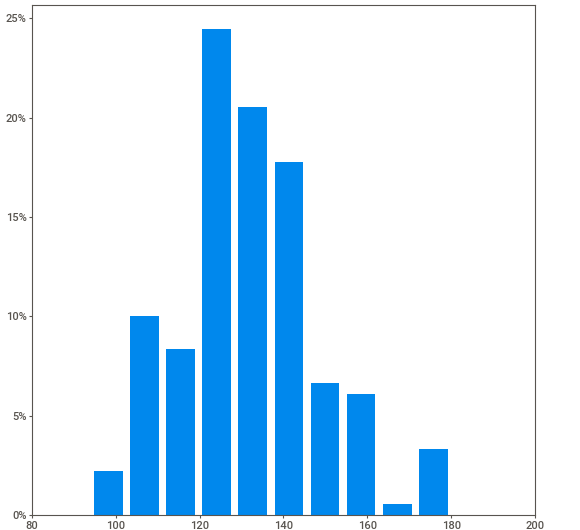
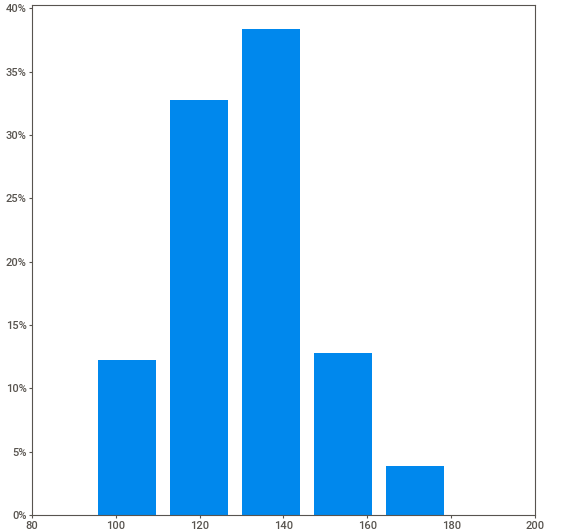
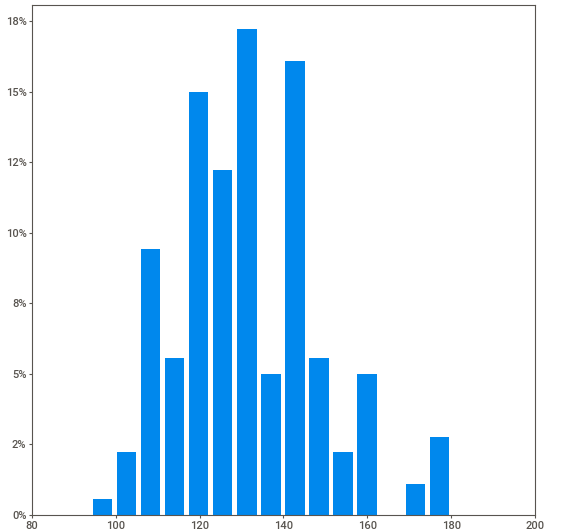
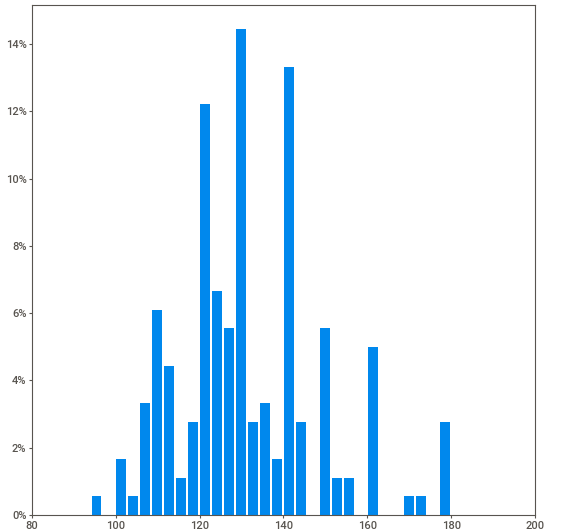
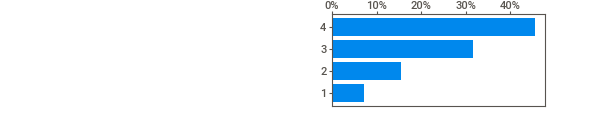
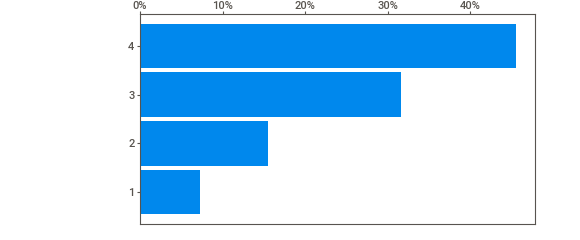
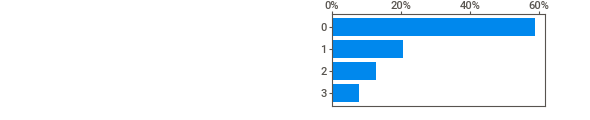
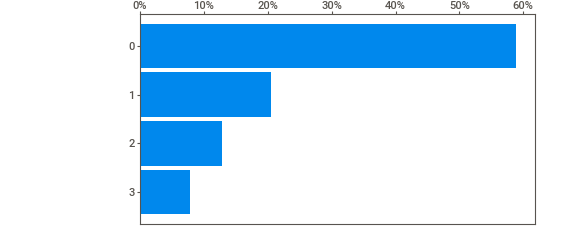
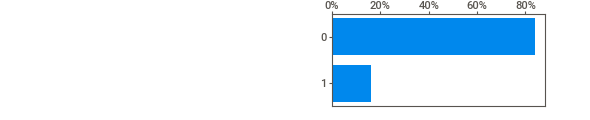
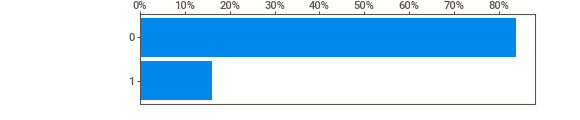
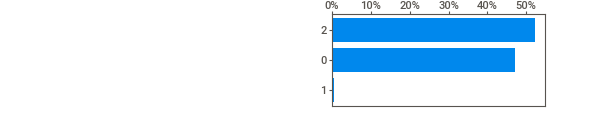
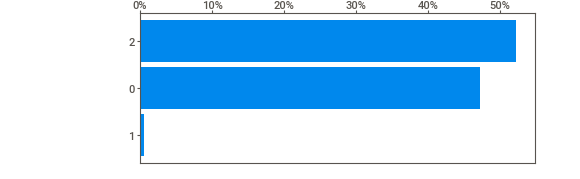
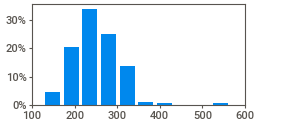
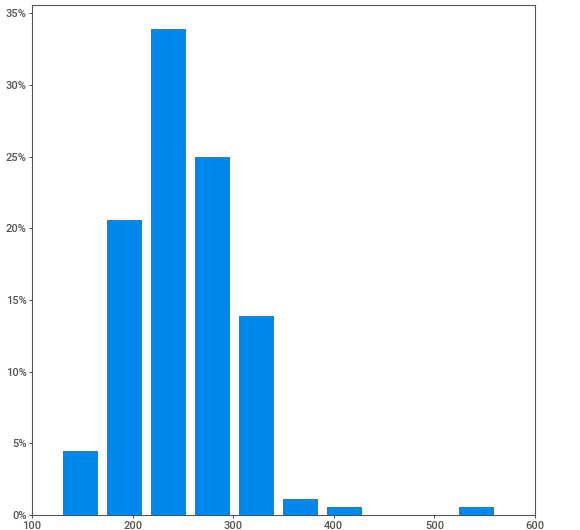
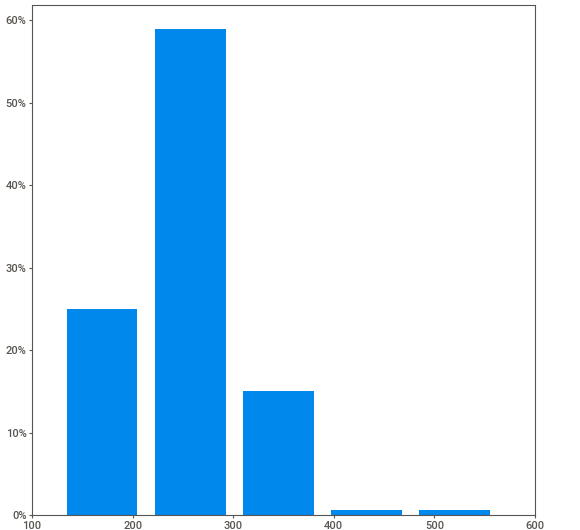
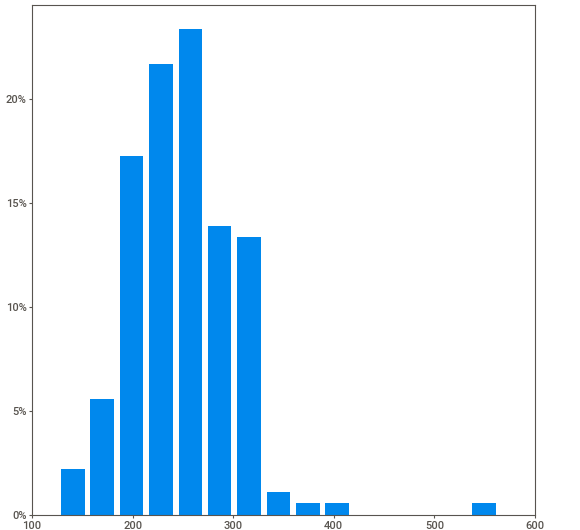
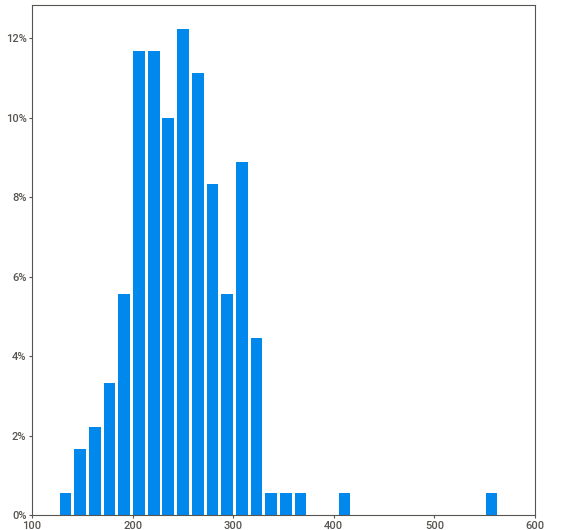
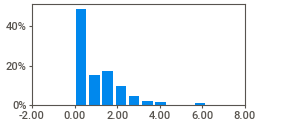
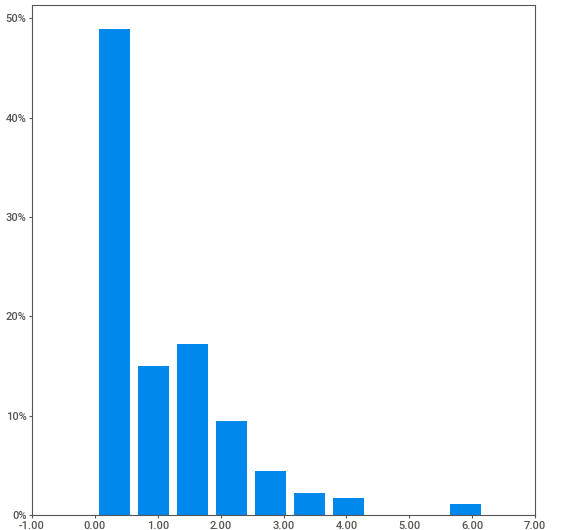
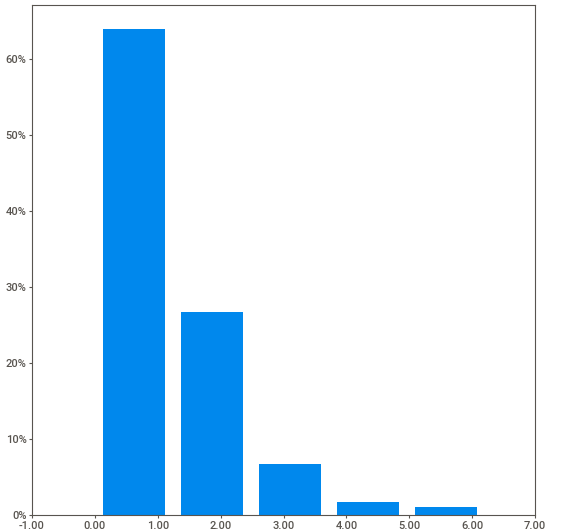
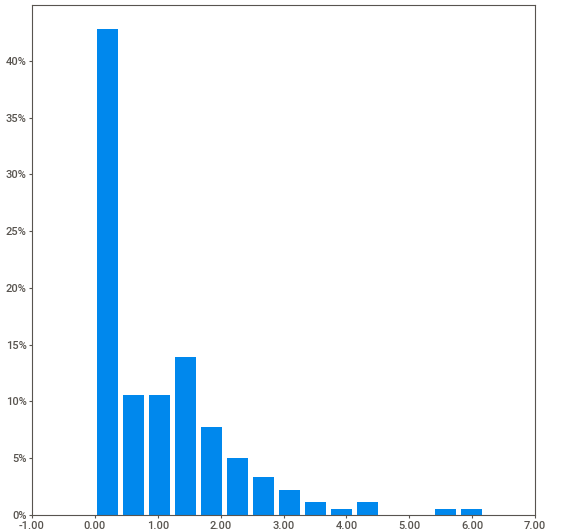
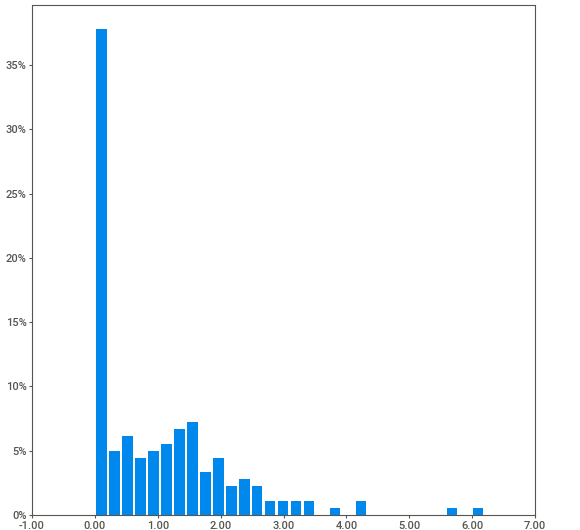
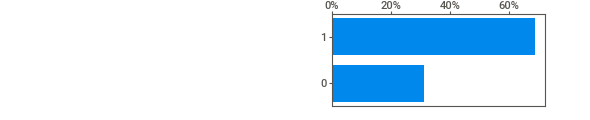
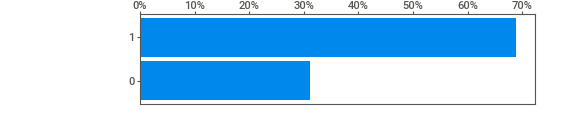
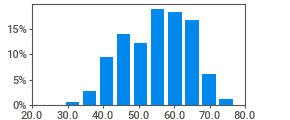
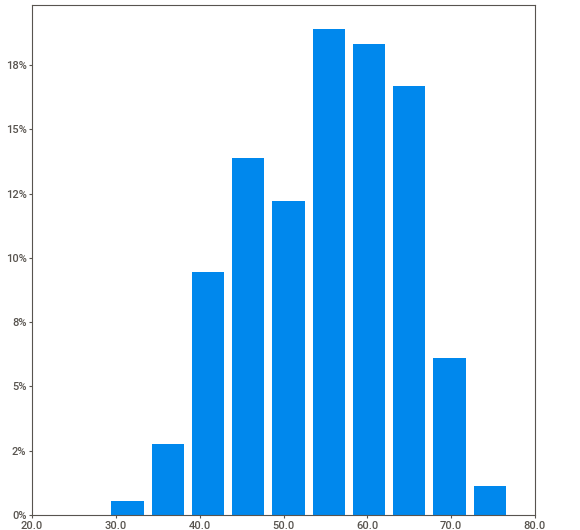
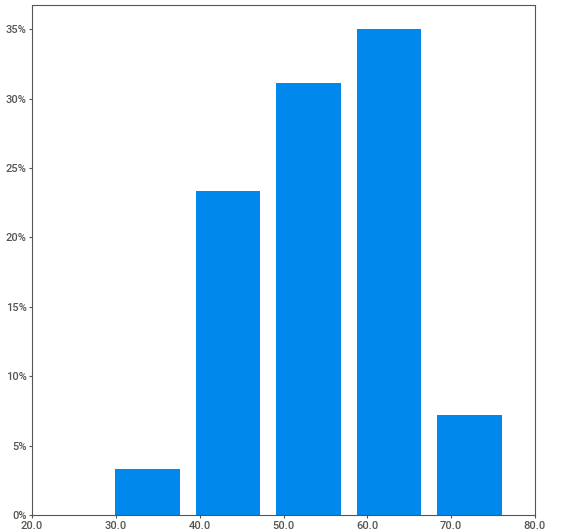
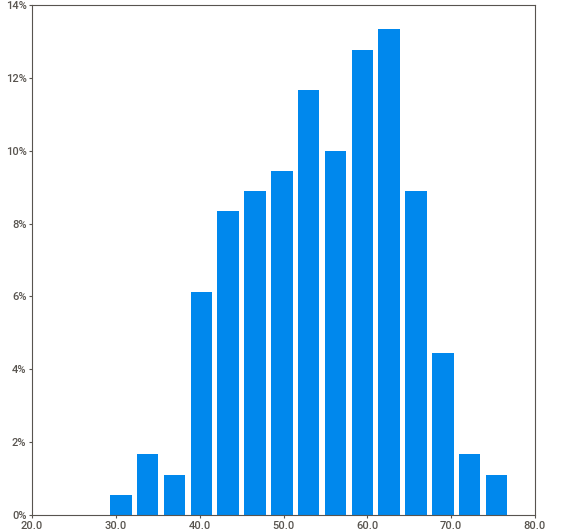
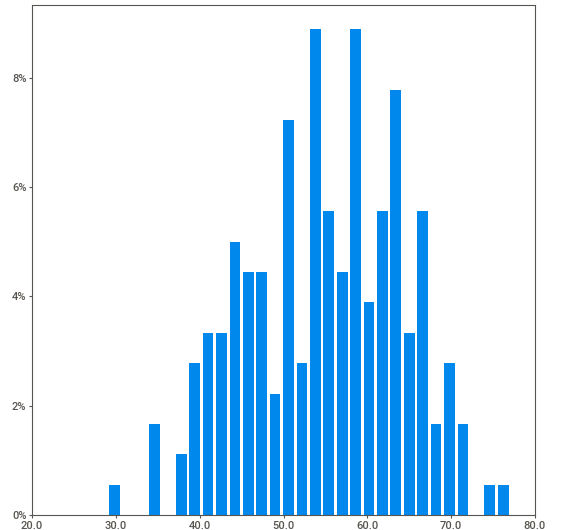
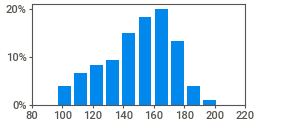
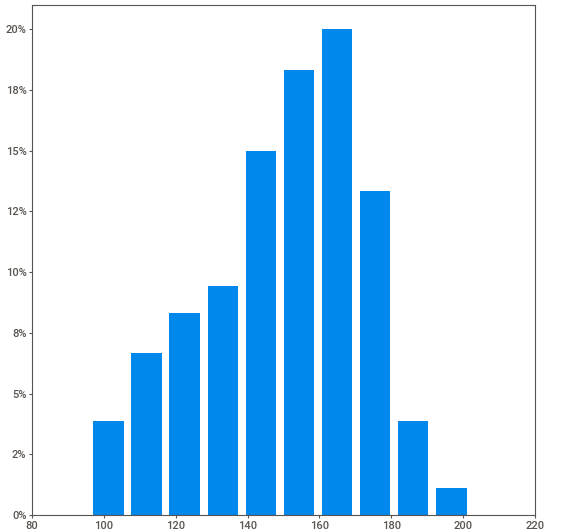
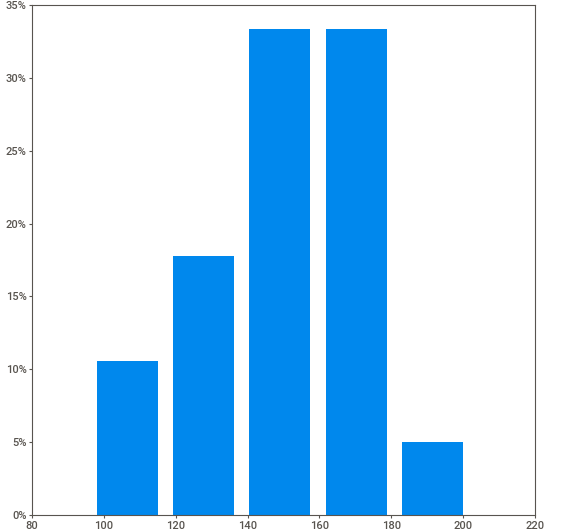
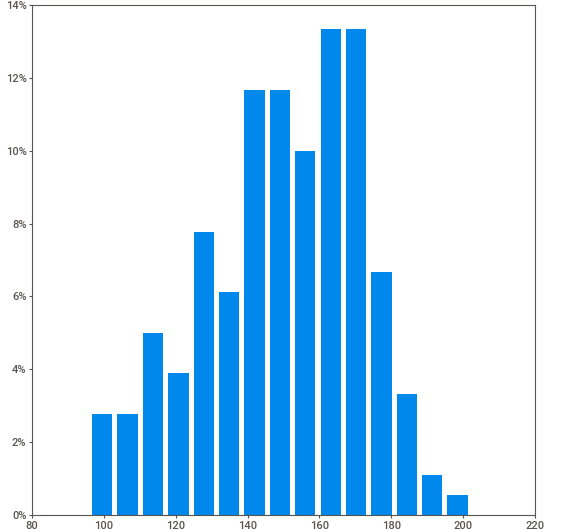
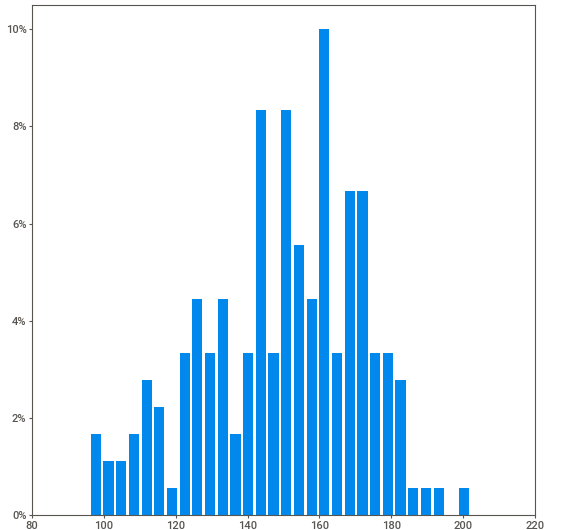
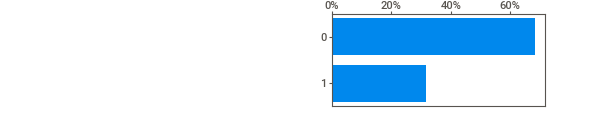
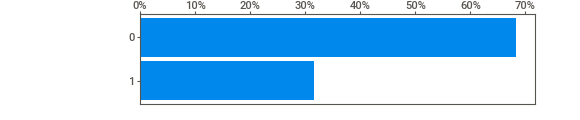
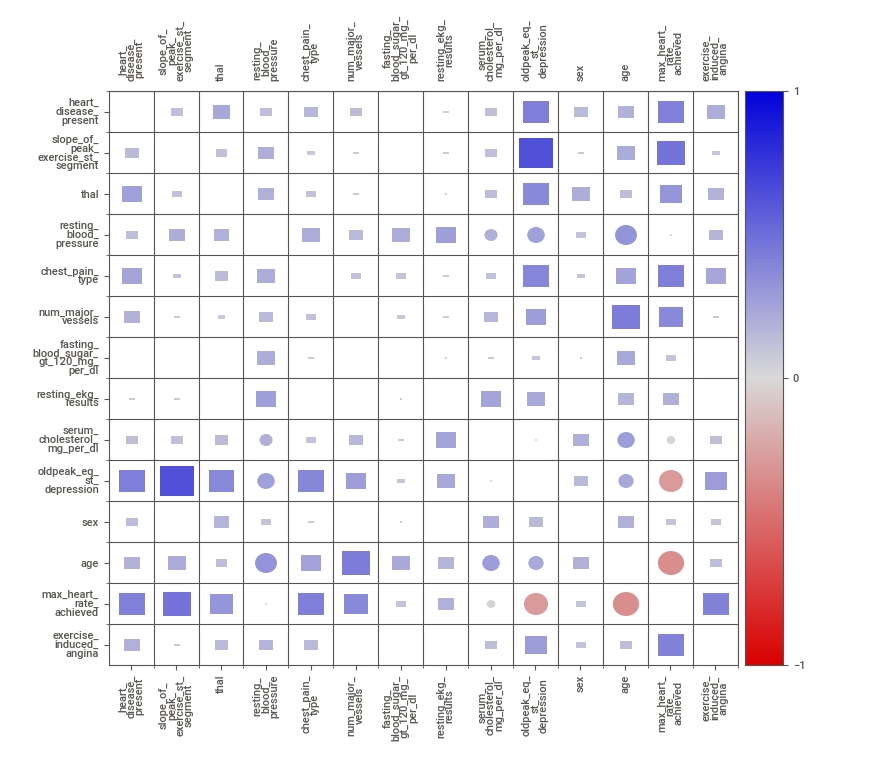
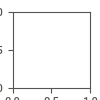

In [141]:
import sweetviz as sv
my_report=sv.analyze (data)
my_report.show_notebook()

In [142]:
#insights:More than 50% data has normal thal.More than 40% data has chest pain value 4.more than 60% has  zero excercise 
# induce angina.Only around 1% data has resting ekg 1.more than 60% data belongs to males.more than 45% data is of age group 
# 55 to 65.Positive skewness and kurtosis in serum cholesterol

# Bivariate Analysis

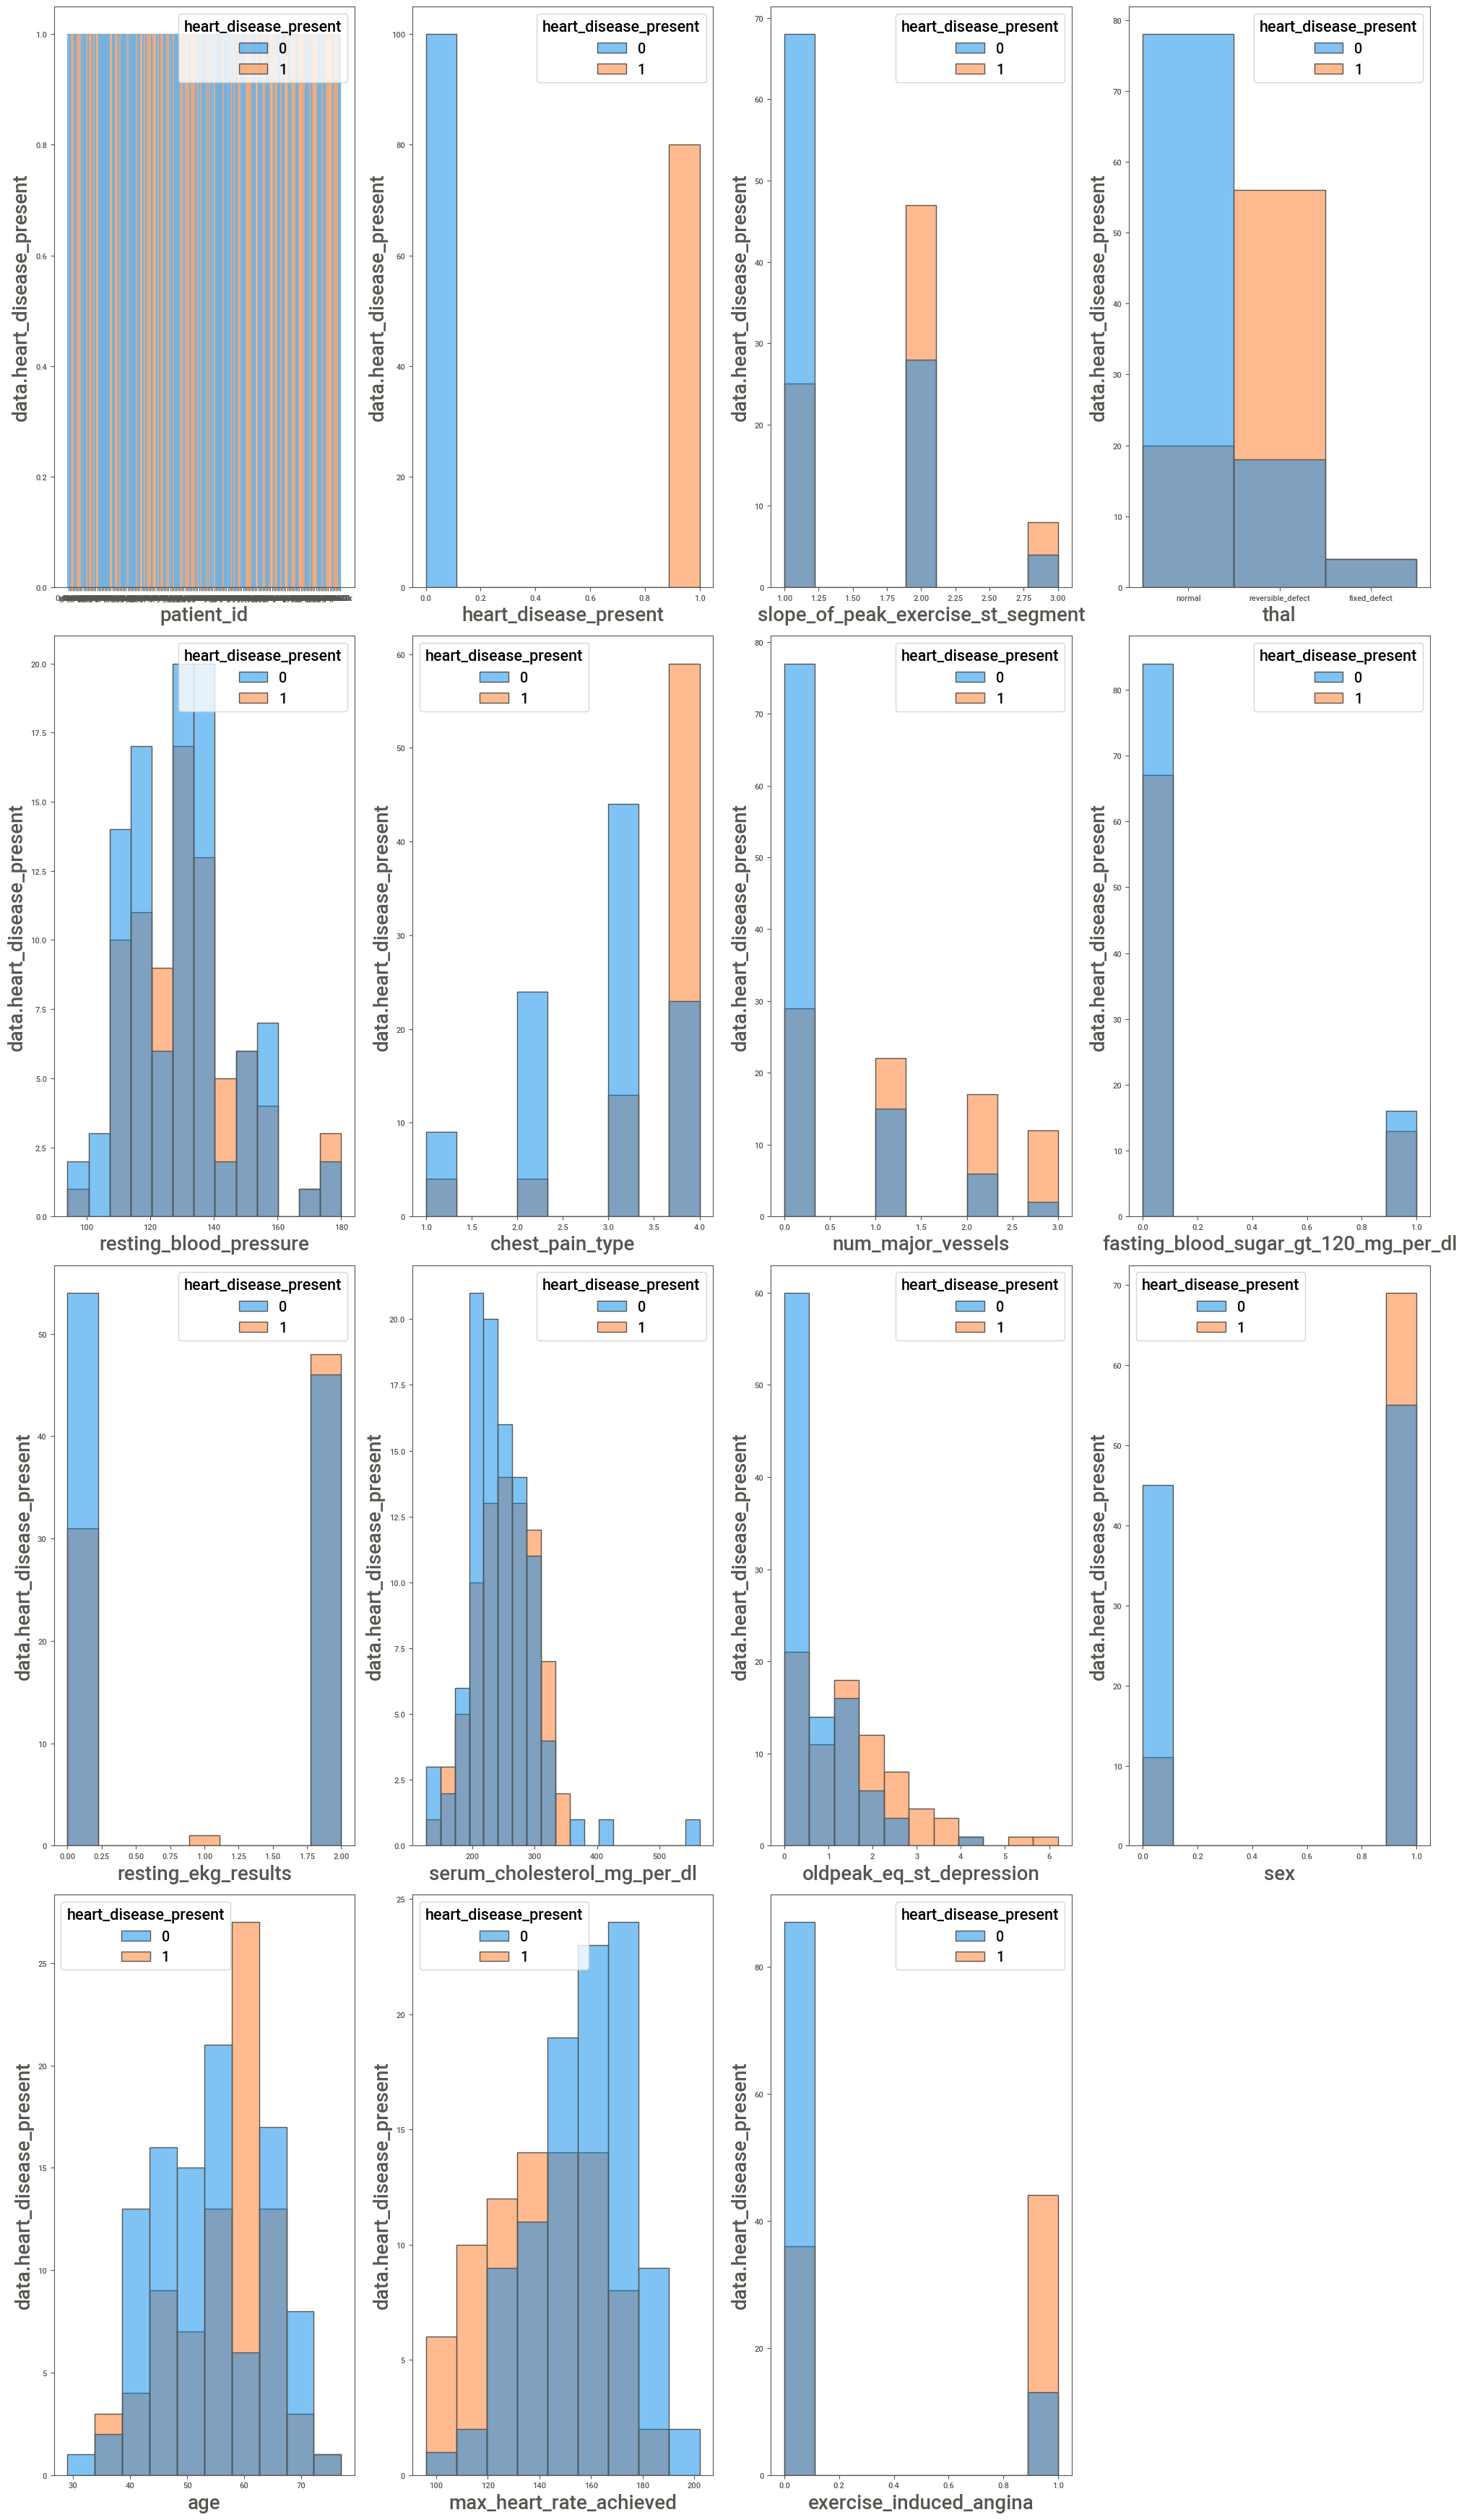

In [143]:
plt.figure(figsize=(20,35), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in data:#accessing the columns 
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=data[column]
                        ,hue=data.heart_disease_present	)
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('data.heart_disease_present',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

In [144]:
#insights: Around 55% heart patients have reversible defect in Thal and around 60% heart patients have chest pain type 4.
#  data shows mostly heart patient are males.

# Mutivariate Analysis

<AxesSubplot:>

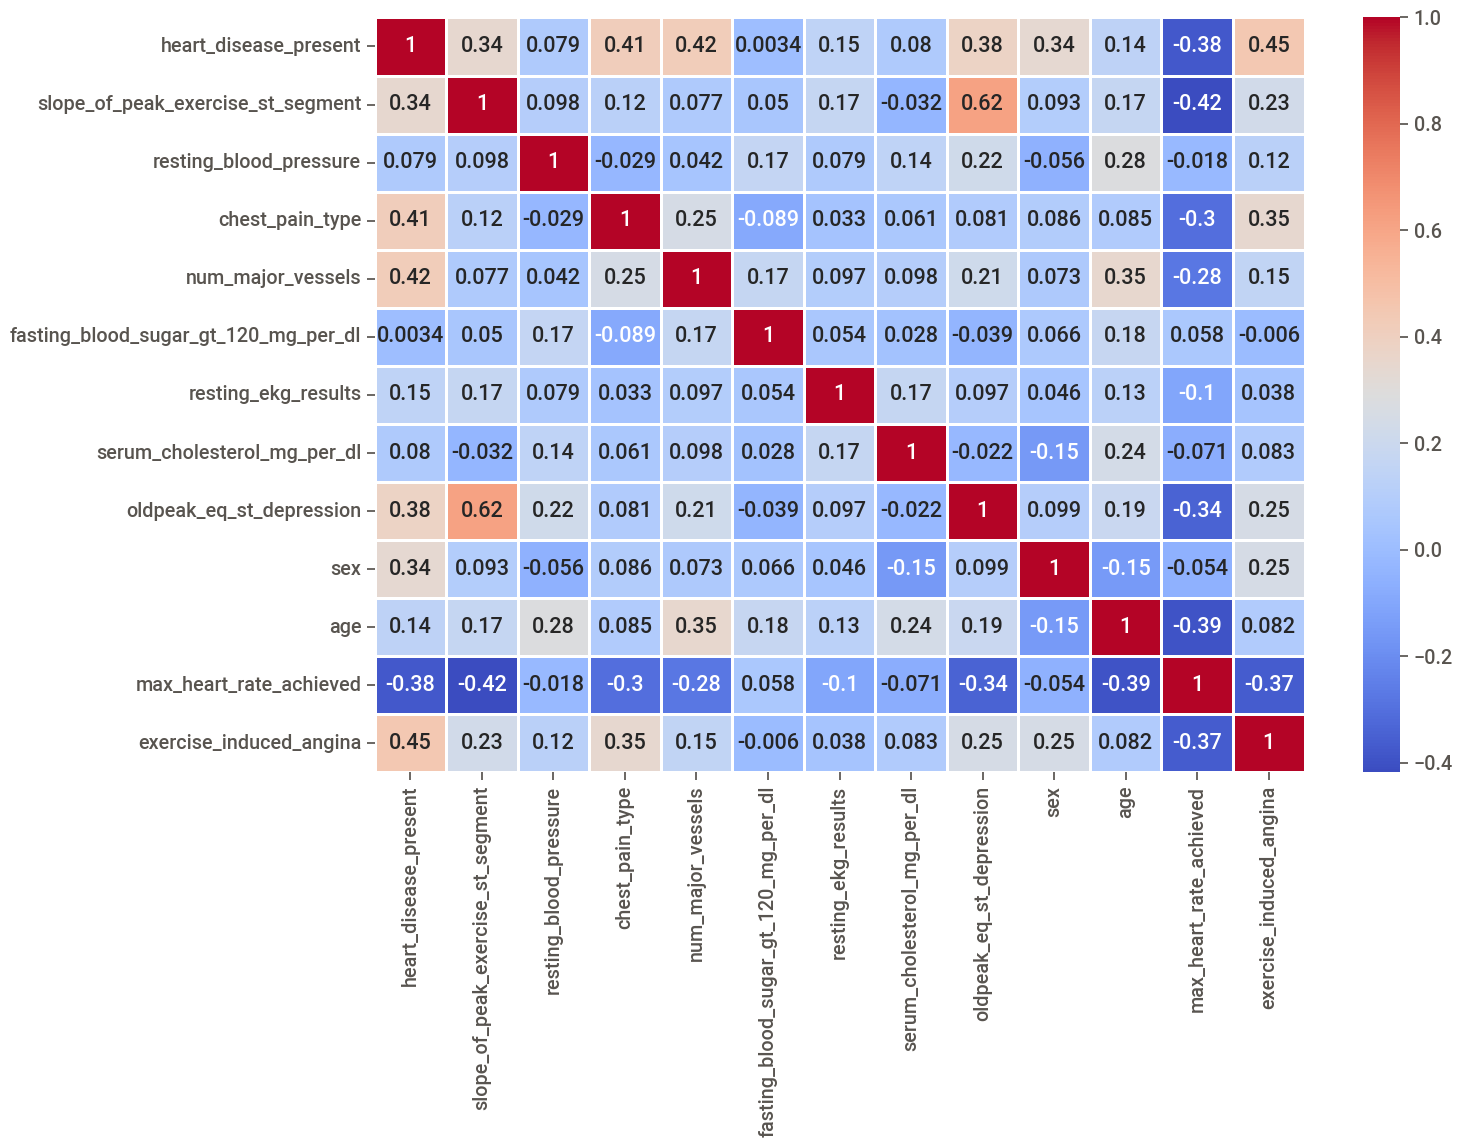

In [246]:
plt.figure(figsize = (15, 10))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(), annot = True,cmap="coolwarm",linewidth=2)

In [146]:
# insights:there is very less correlation between heart disease and fasting blood sugar

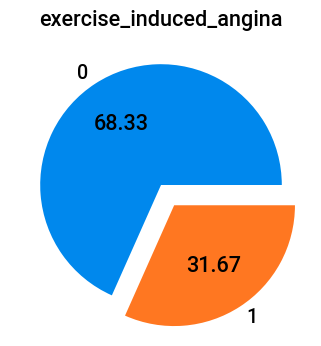

<Figure size 600x400 with 0 Axes>

In [147]:
type_value_count = data['exercise_induced_angina'].value_counts()
explode=[0,0.2]
plt.pie(type_value_count,labels=[0,1],explode=explode,autopct='%.2f')
plt.title('exercise_induced_angina')
plt.show()
plt.tight_layout()

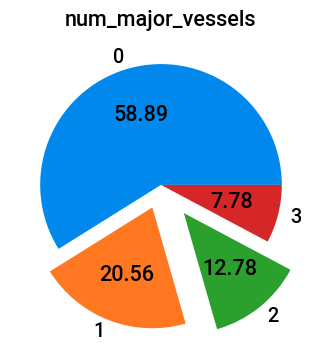

<Figure size 600x400 with 0 Axes>

In [148]:
type_value_count = data['num_major_vessels'].value_counts()
explode=[0,0.2,0.3,0]
plt.pie(type_value_count,labels=[0,1,2,3],explode=explode,autopct='%.2f')
plt.title('num_major_vessels')
plt.show()
plt.tight_layout()

<AxesSubplot:xlabel='heart_disease_present', ylabel='count'>

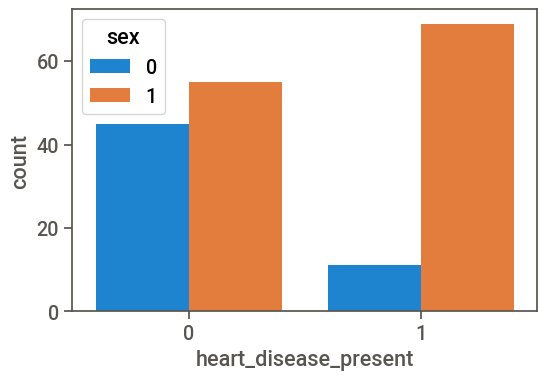

In [149]:
sns.countplot(x=data.heart_disease_present,hue=data.sex)

## Data Preprocessing

In [150]:
data.serum_cholesterol_mg_per_dl.value_counts()	

204    4
239    4
226    3
309    3
211    3
      ..
196    1
218    1
215    1
319    1
201    1
Name: serum_cholesterol_mg_per_dl, Length: 118, dtype: int64

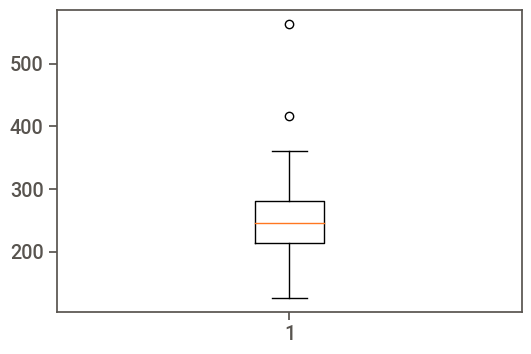

In [151]:
plt.boxplot(data.serum_cholesterol_mg_per_dl)
plt.show()

In [152]:
data.loc[(data.serum_cholesterol_mg_per_dl >=350)]

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
43,yx0q6k,0,1,normal,140,3,1,1,2,417,0.8,0,65,157,0
60,rv6siv,0,2,reversible_defect,115,3,0,0,2,564,1.6,0,67,160,0
118,2fqzg8,1,2,reversible_defect,132,4,1,0,0,353,1.2,1,55,132,1
125,4b32pd,0,1,normal,160,3,0,0,2,360,0.8,0,65,151,0


In [153]:
data.heart_disease_present.value_counts()	

0    100
1     80
Name: heart_disease_present, dtype: int64

In [154]:
data.resting_blood_pressure.value_counts()	

130    26
140    22
120    21
110    11
150    10
160     9
128     8
112     8
125     7
124     5
108     5
118     4
145     4
135     4
138     3
180     3
132     3
126     2
115     2
178     2
142     2
100     2
152     2
136     2
134     2
102     1
94      1
155     1
117     1
170     1
172     1
122     1
156     1
106     1
144     1
105     1
Name: resting_blood_pressure, dtype: int64

In [155]:
data.loc[(data.resting_blood_pressure >170)]

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
4,oyt4ek,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
33,0n5fu0,0,1,normal,180,4,0,0,0,325,0.0,0,64,154,1
72,qwj1yf,0,1,reversible_defect,172,3,0,1,0,199,0.5,1,52,162,0
75,4v0q7o,1,2,reversible_defect,178,4,2,1,0,228,1.0,0,66,165,1
113,sqddbc,1,2,reversible_defect,180,3,0,1,2,274,1.6,1,68,150,1
176,2s2b1f,1,2,normal,180,4,0,0,1,327,3.4,0,55,117,1


In [248]:
data.loc[(data.age<=40)]

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
3,l2xjde,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
14,f06u72,1,2,reversible_defect,120,1,0,0,0,231,3.8,1,38,182,1
18,mc750a,0,1,normal,130,2,0,0,2,204,0.0,1,29,202,0
65,nck22c,1,1,reversible_defect,126,4,0,0,2,282,0.0,1,35,156,1
73,qvhk9e,0,1,normal,120,3,0,0,0,215,0.0,0,37,170,0
100,rfj25e,0,1,normal,140,3,0,0,2,321,0.0,1,39,182,0
121,f4n8ny,0,1,normal,118,2,0,0,0,210,0.7,0,34,192,0
143,7eyvsi,1,2,reversible_defect,110,4,0,0,2,167,2.0,1,40,114,1
146,z8yl4y,0,1,reversible_defect,140,1,0,0,0,199,1.4,1,40,178,1
152,nfag5b,1,2,reversible_defect,120,4,0,0,0,198,1.6,1,35,130,1


In [157]:
df=data.copy()
df.head()

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [158]:

#df.drop([43,60,118,125],axis=0,inplace=True)

In [159]:
df

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,1,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,1,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,1,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,0,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [160]:
df.drop(["patient_id"],axis=1,inplace=True)

In [161]:
df

,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,1,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,1,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [162]:
df.thal.unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [163]:
from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.thal=label.fit_transform(df.thal)#

In [164]:
df

,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,1,128,2,0,0,2,308,0.0,1,45,170,0
1,0,2,1,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,1,125,4,3,0,2,304,0.0,1,77,162,1
3,1,1,2,152,4,0,0,0,223,0.0,1,40,181,0
4,0,3,2,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,2,2,125,4,2,1,0,254,0.2,1,67,163,0
176,1,2,1,180,4,0,0,1,327,3.4,0,55,117,1
177,1,2,2,125,3,0,0,0,309,1.8,1,64,131,1
178,0,1,1,124,3,2,1,0,255,0.0,1,48,175,0


In [165]:
df.thal.dtype

dtype('int32')

In [166]:
#data.drop('patient_id',axis=1,inplace=True)

In [167]:
df.head()

,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,1,128,2,0,0,2,308,0.0,1,45,170,0
1,0,2,1,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,1,125,4,3,0,2,304,0.0,1,77,162,1
3,1,1,2,152,4,0,0,0,223,0.0,1,40,181,0
4,0,3,2,178,1,0,0,2,270,4.2,1,59,145,0


In [168]:
df.head()

,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,1,128,2,0,0,2,308,0.0,1,45,170,0
1,0,2,1,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,1,125,4,3,0,2,304,0.0,1,77,162,1
3,1,1,2,152,4,0,0,0,223,0.0,1,40,181,0
4,0,3,2,178,1,0,0,2,270,4.2,1,59,145,0


In [169]:
X=df.drop('heart_disease_present',axis=1)
y=df.heart_disease_present

In [170]:
X

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,125,4,2,1,0,254,0.2,1,67,163,0
176,2,1,180,4,0,0,1,327,3.4,0,55,117,1
177,2,2,125,3,0,0,0,309,1.8,1,64,131,1
178,1,1,124,3,2,1,0,255,0.0,1,48,175,0


In [171]:
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

In [172]:
y.unique()

array([0, 1], dtype=int64)

In [173]:
y.value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

In [174]:
from imblearn.over_sampling import SMOTE 
sm=SMOTE()
print(y. value_counts())
X_sm,y_sm=sm.fit_resample(X,y)
print(y_sm.value_counts())

0    100
1     80
Name: heart_disease_present, dtype: int64
0    100
1    100
Name: heart_disease_present, dtype: int64


## Logistic Regression

In [175]:
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm, test_size = 0.25,random_state = 42)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [176]:
y_pred1 = log_reg.predict(X_test)
y_pred1

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0], dtype=int64)

In [177]:
y_train_pre=log_reg.predict(X_train)
y_train_pre

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [178]:
train_accuracy = accuracy_score(y_train,y_train_pre)
train_accuracy 


0.8133333333333334

In [179]:
LR_acc=accuracy_score(y_test,y_pred1)
LR_acc

0.8

In [180]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        26
           1       0.82      0.75      0.78        24

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



In [181]:
cm=confusion_matrix(y_test,y_pred1)
cm

array([[22,  4],
       [ 6, 18]], dtype=int64)

In [182]:
pd.crosstab(y_test, y_pred1)

col_0,0,1
heart_disease_present,,
0,22,4
1,6,18


## K Neighbours

In [183]:
from sklearn.neighbors import KNeighborsClassifier


In [184]:
error_rate = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [185]:
error_rate

[0.28, 0.36, 0.26, 0.32, 0.36, 0.36, 0.26, 0.34, 0.4, 0.34]

Text(0, 0.5, 'Error Rate')

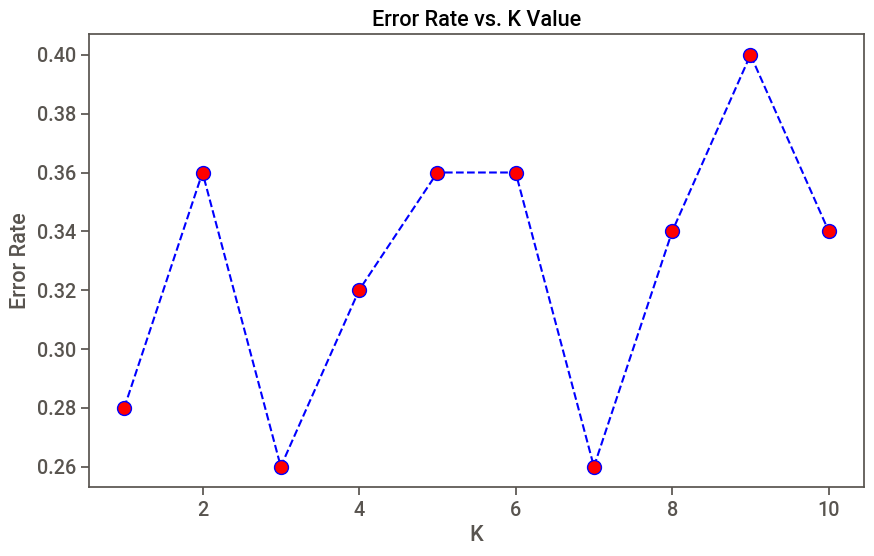

In [186]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [340]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [341]:
y_pred2 = knn.predict(X_test)
y_pred2

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0], dtype=int64)

In [342]:
KNC_accuracy=accuracy_score(y_test,y_pred2)
KNC_accuracy

0.74

# Decision Tree Classifier

In [190]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier() 
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)
y_pred3

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0], dtype=int64)

In [191]:
DT_accuracy=accuracy_score(y_test,y_pred3)

In [192]:
DT_accuracy

0.8

In [193]:
y_train_pred3=dt.predict(X_train)
acc_train1=accuracy_score(y_train,y_train_pred3)
acc_train1

1.0

In [194]:
print(classification_report(y_train,y_train_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        76

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [195]:
pd.crosstab(y_train,y_train_pred3)

col_0,0,1
heart_disease_present,,
0,74,0
1,0,76


In [196]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.79      0.79      0.79        24

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



In [197]:
test_f1=f1_score(y_test,y_pred3)
test_f1

0.7916666666666666

In [198]:
pd.crosstab(y_test,y_pred3)

col_0,0,1
heart_disease_present,,
0,21,5
1,5,19


## Hyperparameters of DecisionTree

In [199]:
from sklearn.model_selection import GridSearchCV


In [200]:
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters


Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'})


In [201]:
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'random'}

In [202]:
tree_cv.best_score_

0.7594685673011344

In [203]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_leaf= 1,min_samples_split=3,splitter='random')#passing

In [204]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=3, splitter='random')

In [205]:
y_pred4=dt1.predict(X_test)#predicting
y_pred4

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1], dtype=int64)

In [206]:
y_train4=dt1.predict(X_train)

In [207]:
acc_train2 = accuracy_score(y_train,y_train4)
acc_train2

0.9533333333333334

In [210]:
dt1_acc=accuracy_score(y_test,y_pred4)#checking accuracy
dt1_acc

0.72

In [211]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        26
           1       0.69      0.75      0.72        24

    accuracy                           0.72        50
   macro avg       0.72      0.72      0.72        50
weighted avg       0.72      0.72      0.72        50



# Random Forest Classifier

In [343]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [344]:
y_pred5=rf_clf.predict(X_test)

In [345]:
y_pred5

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0], dtype=int64)

In [346]:
RF_accuracy=accuracy_score(y_test,y_pred5)


In [347]:
RF_accuracy

0.86

## Hyperparameter Tunning

In [217]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)


rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_ 
print(f"Best paramters: {rf_best_params})")
 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True})


In [218]:
rf_best_params

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [219]:
dt2=RandomForestClassifier(n_estimators=2000,min_samples_split=5,min_samples_leaf=1,max_features='sqrt',max_depth=10,bootstrap= True)

In [220]:
dt2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=5,
                       n_estimators=2000)

In [221]:
y_pred5=dt2.predict(X_test)


In [222]:
rf_acc=accuracy_score(y_test,y_pred5)
rf_acc

0.84

In [223]:
f1_score_rf=f1_score(y_test,y_pred5)
f1_score_rf

0.8333333333333334

In [224]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        26
           1       0.83      0.83      0.83        24

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50



## Gradient Boosting

In [226]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() 
gbm.fit(X_train,y_train) 
y_pred6=gbm.predict(X_test)
y_pred6

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0], dtype=int64)

In [227]:
GB_acc=accuracy_score(y_test,y_pred6)

In [228]:
GB_acc

0.86

In [229]:
import xgboost 

In [230]:
from xgboost import XGBClassifier#importing the model library
xgb_r=XGBClassifier() ## object creation
xgb_r.fit(X_train,y_train)# fitting the data
y_pred7=xgb_r.predict(X_test)#predicting the price

In [231]:
y_pred7

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0])

In [232]:
XGB_acc=accuracy_score(y_test,y_pred7)

In [233]:
XGB_acc

0.84

## Hyper parameter tunning in XG boost

In [234]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(X_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 0.8, 'reg_alpha': 3.2, 'n_estimators': 80, 'max_depth': 13, 'learning_rate': 0.7, 'gamma': 0.4})


In [235]:
cv_best_params

{'reg_lambda': 0.8,
 'reg_alpha': 3.2,
 'n_estimators': 80,
 'max_depth': 13,
 'learning_rate': 0.7,
 'gamma': 0.4}

In [236]:
XGB2=XGBClassifier(reg_lambda= 0.8, reg_alpha= 3.2, n_estimators=80, max_depth=13, learning_rate=0.7, gamma=0.4)
XGB2.fit(X_train, y_train)#training 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.7, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=13, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=80, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=3.2, reg_lambda=0.8, ...)

In [237]:
y_pred8=XGB2.predict(X_test)#

In [238]:
f1_score_XGB2=f1_score(y_pred8,y_test)

In [239]:
f1_score_XGB2

0.7755102040816326

In [240]:
XGB2_acc=accuracy_score(y_test,y_pred8)
XGB2_acc

0.78